<a href="https://colab.research.google.com/github/franfgv9/Milestone_1_PLN/blob/main/Tarea_1_proyecto_PLN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd

# URL "raw" del archivo HateBR.csv en GitHub
url = "https://raw.githubusercontent.com/franfgv9/Milestone_1_PLN/refs/heads/main/HateBR.csv"

# Leer el CSV directamente desde GitHub
df = pd.read_csv(url)

# Verificar la carga
print("Dimensiones del dataset:", df.shape)
print("Columnas disponibles:", df.columns.tolist())
df.head()

Dimensiones del dataset: (7000, 8)
Columnas disponibles: ['id', 'comentario', 'anotator1', 'anotator2', 'anotator3', 'label_final', 'links_post', 'account_post']


,id,comentario,anotator1,anotator2,anotator3,label_final,links_post,account_post
0,1,Mais um lixo,1,1,1,1,https://www.instagram.com/p/B2uThqdH9xI/,Carla Zambelli
1,2,Essa nao tem vergonha na cara!!,1,1,1,1,https://www.instagram.com/p/B2uThqdH9xI/,Carla Zambelli
2,3,Essa mulher é doente.pilantra!,1,1,1,1,https://www.instagram.com/p/B2uThqdH9xI/,Carla Zambelli
3,4,Comunista safada...,1,1,1,1,https://www.instagram.com/p/B2uThqdH9xI/,Carla Zambelli
4,5,Vagabunda. Comunista. Mentirosa. O povo chilen...,1,1,1,1,https://www.instagram.com/p/B2uThqdH9xI/,Carla Zambelli


In [13]:
# ============================================================
# Seleccionar únicamente las columnas relevantes
# ============================================================

df = df[["id", "comentario", "label_final"]]

# Verificar el resultado
print("Columnas seleccionadas:", df.columns.tolist())
print("Dimensiones del dataset:", df.shape)

df.head()

Columnas seleccionadas: ['id', 'comentario', 'label_final']
Dimensiones del dataset: (7000, 3)


,id,comentario,label_final
0,1,Mais um lixo,1
1,2,Essa nao tem vergonha na cara!!,1
2,3,Essa mulher é doente.pilantra!,1
3,4,Comunista safada...,1
4,5,Vagabunda. Comunista. Mentirosa. O povo chilen...,1


In [14]:
# ============================================================
# Renombrar las columnas para uniformidad
# ============================================================

df = df.rename(columns={
    "comentario": "text",
    "label_final": "label"
})

print("Columnas finales:", df.columns.tolist())
df.head()

print(df.info())

Columnas finales: ['id', 'text', 'label']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7000 non-null   int64 
 1   text    7000 non-null   object
 2   label   7000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 164.2+ KB
None


In [15]:
# VEMOS UNA BUENA CANTIDAD DE EJEMPLOS
df.head(30)

,id,text,label
0,1,Mais um lixo,1
1,2,Essa nao tem vergonha na cara!!,1
2,3,Essa mulher é doente.pilantra!,1
3,4,Comunista safada...,1
4,5,Vagabunda. Comunista. Mentirosa. O povo chilen...,1
5,6,"COMUNISTA SAFADA, MALPARIDA, MAMAGUEVA, DESGRA...",1
6,7,Besta quadrada.,1
7,8,Se elegeu as nossas custas,1
8,9,Comunista lixo!,1
9,10,"Quem tem pena é galinha, mas ela é uma VACA LO...",1



Número de ejemplos por clase:
label
0    3500
1    3500
Name: count, dtype: int64

Porcentaje de clases:
label
0    50.0
1    50.0
Name: count, dtype: float64


/tmp/ipython-input-3528509484.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_labels, y=class_counts.values, palette="pastel")


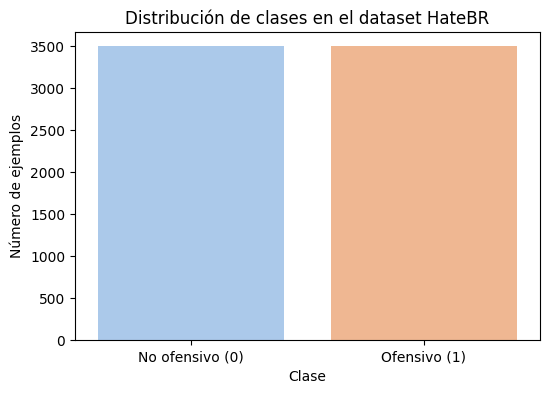

In [16]:
# ============================================================
# 1. Exploración de clases
# ============================================================

import seaborn as sns
import matplotlib.pyplot as plt

# Conteo de clases
class_counts = df["label"].value_counts().sort_index()      # cuenta cuantos valores por clase (en este caso 0:3500 y 1:3500) y los ordena --> primero 0 luego 1
class_labels = ["No ofensivo (0)", "Ofensivo (1)"]

print("\nNúmero de ejemplos por clase:")
print(class_counts)

# Porcentaje de cada clase
percentages = (class_counts / len(df) * 100).round(2)
print("\nPorcentaje de clases:")
print(percentages)

# ============================================================
# 2. Visualización de la distribución
# ============================================================

plt.figure(figsize=(6,4))
sns.barplot(x=class_labels, y=class_counts.values, palette="pastel")
plt.title("Distribución de clases en el dataset HateBR")
plt.ylabel("Número de ejemplos")
plt.xlabel("Clase")
plt.show()

In [17]:
# Longitud media de los comentarios
df['word_count'] = df['text'].str.split().apply(len)
df.groupby('label')['word_count'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,3500.0,12.522571,13.178434,1.0,5.0,8.0,15.0,171.0
1,3500.0,15.345143,15.536119,1.0,6.0,10.5,19.0,189.0


Los comentarios mas cortos tienden a ser inofensivos, aunque no por mucho margen

Qué haces:
Ver si los ofensivos tienden a ser más cortos o más largos.

Qué buscas:

Si los ofensivos son breves (“lixo”, “burro”, “vai embora”), podrías crear una regla sobre brevedad + insulto.

Posible regla:

Si el comentario tiene < 5 palabras y alguna palabra ofensiva → probablemente ofensivo.

In [18]:
# Presencia de menciones (@usuario)
df['has_mention'] = df['text'].str.contains('@')
df.groupby('has_mention')['label'].value_counts(normalize=True)

has_mention  label
False        1        0.509271
             0        0.490729
True         0        0.613636
             1        0.386364
Name: proportion, dtype: float64

Vemos que el 61% de las personas que etiquetan a alguien en sus comentarios es porque no es ofensivo

In [19]:
# Presencia de hastags (#)
df['has_hastag'] = df['text'].str.contains('#')
df.groupby('has_hastag')['label'].value_counts(normalize=True)

has_hastag  label
False       0        0.502853
            1        0.497147
True        1        0.618182
            0        0.381818
Name: proportion, dtype: float64

In [20]:
# Presencia de URLs
df['has_url'] = df['text'].str.contains(r'http|www', case=False)
df.groupby('has_url')['label'].value_counts(normalize=True)


has_url  label
False    0        0.500071
         1        0.499929
True     1        0.666667
         0        0.333333
Name: proportion, dtype: float64

Aqui pasa lo contrario, los posts con presencia de urls tienen un 66% de ser ofensivos

In [21]:
# Presencia de emojis
import re
emoji_pattern = re.compile("[\U00010000-\U0010ffff]", flags=re.UNICODE)
df['has_emoji'] = df['text'].apply(lambda x: bool(emoji_pattern.search(x)))
df.groupby('has_emoji')['label'].value_counts(normalize=True)

has_emoji  label
False      1        0.549952
           0        0.450048
True       0        0.639566
           1        0.360434
Name: proportion, dtype: float64

La mayoría de comentarios con emojis son inofensivos

In [22]:
# Uso de mayúsculas
df['caps_ratio'] = df['text'].apply(lambda x: sum(1 for c in x if c.isupper()) / len(x) if len(x)>0 else 0)
df.groupby('label')['caps_ratio'].mean()

,caps_ratio
label,
0,0.059868
1,0.074745


Los comentarios ofensivos (label = 1) tienen, en promedio (7'4%), más mayúsculas que los no ofensivos (5'9%).

Aunque la diferencia no es enorme, sí existe una tendencia clara:
los usuarios tienden a usar más mayúsculas cuando escriben mensajes agresivos o emocionales.

Este rasgo podría servir como una regla complementaria en tu Milestone 1 (rule-based system).

Ejemplo de regla simple:

if caps_ratio > 0.08: label = 1  # probablemente ofensivo


No debe usarse sola (porque hay mensajes no ofensivos en mayúsculas, como “FELIZ ANIVERSÁRIO!”),
pero combinada con otras señales (insultos, exclamaciones, menciones) puede mejorar la precisión.

In [23]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from collections import Counter

stopwords_pt = set(stopwords.words('portuguese'))

def clean_and_tokenize(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar signos de puntuación y números
    text = re.sub(r'[^a-záéíóúàâêôãõç\s]', '', text)
    # Tokenizar
    words = text.split()
    # Filtrar stopwords
    return [w for w in words if w not in stopwords_pt and len(w) > 2]

# Ofensivos
offensive_tokens = df[df['label']==1]['text'].apply(clean_and_tokenize).sum()
offensive_words = Counter(offensive_tokens).most_common(20)

# No ofensivos
non_offensive_tokens = df[df['label']==0]['text'].apply(clean_and_tokenize).sum()
non_offensive_words = Counter(non_offensive_tokens).most_common(20)

print("Palabras más comunes (ofensivos):", offensive_words)
print("Palabras más comunes (no ofensivos):", non_offensive_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Palabras más comunes (ofensivos): [('pra', 351), ('vai', 264), ('brasil', 226), ('cara', 186), ('presidente', 160), ('povo', 155), ('vergonha', 154), ('esquerda', 141), ('lixo', 132), ('nada', 130), ('pirralha', 130), ('país', 127), ('lula', 126), ('bolsonaro', 119), ('desse', 117), ('ainda', 115), ('deus', 113), ('todos', 110), ('fazer', 109), ('tudo', 109)]
Palabras más comunes (no ofensivos): [('presidente', 352), ('parabéns', 323), ('deus', 284), ('brasil', 261), ('pra', 171), ('bolsonaro', 165), ('sempre', 135), ('bem', 128), ('lula', 123), ('melhor', 122), ('todos', 120), ('vai', 119), ('ter', 107), ('haddad', 107), ('país', 105), ('povo', 103), ('tudo', 99), ('vamos', 89), ('mulher', 85), ('grande', 77)]


Palabras comunes que solo aparecen en los ofensivos pueden ser útiles como reglas.

In [24]:
import re
df['has_repetition'] = df['text'].apply(lambda x: bool(re.search(r'(.)\1{2,}', x)))
df.groupby('has_repetition')['label'].value_counts(normalize=True)

has_repetition  label
False           0        0.500907
                1        0.499093
True            1        0.502205
                0        0.497795
Name: proportion, dtype: float64

Qué haces:
Detectar secuencias con una misma letra repetida más de 2 veces ("nooossaaaa", "liiiindooo").

Qué buscas:

Si son más comunes en ofensivos, reflejan sarcasmo, ironía o emoción exagerada.

Si no lo son, puedes eliminarlas en limpieza.

Posible regla:

Si el texto contiene repeticiones exageradas → añadir un pequeño peso a la categoría ofensiva.

In [25]:
# Uso de signos de interrogación
df['question_count'] = df['text'].str.count('\?')
df.groupby('label')['question_count'].mean()

<>:2: SyntaxWarning: invalid escape sequence '\?'
<>:2: SyntaxWarning: invalid escape sequence '\?'
/tmp/ipython-input-3284096510.py:2: SyntaxWarning: invalid escape sequence '\?'
  df['question_count'] = df['text'].str.count('\?')


,question_count
label,
0,0.163143
1,0.205429


Qué haces:
Contar cuántos ? aparecen por texto.

Qué buscas ver:

Algunos ofensivos pueden usar muchas preguntas retóricas (“quem te perguntou???”).

Si ves un patrón claro, podrías mantener estos símbolos como rasgo de ironía o agresión.

Posible regla:

Si un texto contiene varias interrogaciones consecutivas, puede ser una burla o desafío → ofensivo.

Podemos ver que hay más comentarios ofensivos que cuentan con "?" que inofensivos llevando a la hipotesis y una posible regla acerca de burla o ironia

In [26]:
# Presencia de pronombres de segunda persona
pronouns = ['você', 'tu', 'teu', 'seu', 'vc']
df['has_2nd_person'] = df['text'].apply(lambda x: any(p in x.lower() for p in pronouns))
df.groupby('has_2nd_person')['label'].value_counts(normalize=True)

has_2nd_person  label
False           1        0.501444
                0        0.498556
True            0        0.505479
                1        0.494521
Name: proportion, dtype: float64

Qué haces:
Buscar palabras como “você”, “tu”, “seu”, “teu”.

Qué buscas:

Ataques directos (“você é um idiota”) → más comunes en ofensivos.

Posible regla:

Si contiene pronombre de segunda persona + palabra negativa → ofensivo.



Vemos que no hay diferencia a penas, aunque si lo combinamos de un insulto puede convertirse en una regla bastante clara

Una vez tenemos estos resultados vamos a realizar la limpieza de los datos.

Para ello, nos hemos dado cuenta que debemos hacer lo siguiente:

1.	Mantener las mayúsculas

2.	Quitar signos de puntuación innecesarios (mantener ?)

3.	Eliminar caracteres no alfabéticos o espacios múltiples

4. Mantener emojis, menciones y hastags

Sin embargo, no voy a eliminar todavía las stopwords ni haré lematización porque voy a usar análisis lingüístico posterior con spaCy, pues esa librería puede beneficiarse de ver el texto completo.

In [27]:
import re
import pandas as pd

def clean_text_preserve_case_emojis_questions(text):
    # 1️⃣ Eliminar puntuación innecesaria (pero mantener ?, @, # y emojis)
    # Quitamos comas, puntos, signos innecesarios, pero dejamos interrogaciones y símbolos expresivos
    text = re.sub(r'[!"$%&\'()*+,\-./:;<=>\[\]\\^_`{|}~]', ' ', text)

    # 2️⃣ Mantener letras (mayúsculas y minúsculas), acentos, emojis, @, # y signos de interrogación
    text = re.sub(
        r'[^A-Za-zÁÉÍÓÚÀÂÊÔÃÕÇáéíóúàâêôãõç@#\? '
        r'\U0001F300-\U0001F5FF'
        r'\U0001F600-\U0001F64F'
        r'\U0001F900-\U0001FAFF'
        r'\U00002700-\U000027BF]',
        ' ', text
    )

    # 3️⃣ Reemplazar espacios múltiples por uno solo
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Aplicar al DataFrame
df['clean_text'] = df['text'].apply(clean_text_preserve_case_emojis_questions)

# Ver resultados
df[['text', 'clean_text']].head(25)


,text,clean_text
0,Mais um lixo,Mais um lixo
1,Essa nao tem vergonha na cara!!,Essa nao tem vergonha na cara
2,Essa mulher é doente.pilantra!,Essa mulher é doente pilantra
3,Comunista safada...,Comunista safada
4,Vagabunda. Comunista. Mentirosa. O povo chilen...,Vagabunda Comunista Mentirosa O povo chileno n...
5,"COMUNISTA SAFADA, MALPARIDA, MAMAGUEVA, DESGRA...",COMUNISTA SAFADA MALPARIDA MAMAGUEVA DESGRAÇAD...
6,Besta quadrada.,Besta quadrada
7,Se elegeu as nossas custas,Se elegeu as nossas custas
8,Comunista lixo!,Comunista lixo
9,"Quem tem pena é galinha, mas ela é uma VACA LO...",Quem tem pena é galinha mas ela é uma VACA LOUCA


In [30]:
!pip install spacy
!python -m spacy download pt_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 18.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [31]:
# Procesar tu texto con spaCy

import spacy

# Cargar modelo de portugués
nlp = spacy.load("pt_core_news_md")

# Procesar un ejemplo (puedes hacerlo sobre un subconjunto del dataset para exploración)
example = df['clean_text'].iloc[0]
doc = nlp(example)

# Mostrar análisis básico
for token in doc:
    print(f"{token.text:<15}  | POS: {token.pos_:<10} | Lemma: {token.lemma_:<15} | Dep: {token.dep_}")

Mais             | POS: ADV        | Lemma: mais            | Dep: advmod
um               | POS: NUM        | Lemma: um              | Dep: nummod
lixo             | POS: NOUN       | Lemma: lixo            | Dep: ROOT


In [32]:
# Extraer entidades (NER)
for ent in doc.ents:
    print(f"Entidad: {ent.text:<20} | Tipo: {ent.label_}")

In [33]:
# spaCy no incluye sentimiento nativo en portugués, pero puedes añadirlo fácilmente con spacytextblob
!pip install spacytextblob

In [34]:
# Análisis de sentimiento
from spacytextblob.spacytextblob import SpacyTextBlob

nlp.add_pipe("spacytextblob")

doc = nlp(example)
print("Polaridad:", doc._.blob.polarity)


Polaridad: 0.0


In [ ]:
# # Aplicar el procesamiento a tu dataset
# # Ejemplo para procesar solo 10 textos (por rendimiento):
# def linguistic_features(text):
#     doc = nlp(text)
#     return {
#         "tokens": [t.text for t in doc],
#         "lemmas": [t.lemma_ for t in doc],
#         "pos_tags": [t.pos_ for t in doc],
#         "entities": [ent.text for ent in doc.ents],
#         "has_proper_name": any(t.pos_ == "PROPN" for t in doc),
#         "num_adjectives": sum(1 for t in doc if t.pos_ == "ADJ"),
#         "num_verbs": sum(1 for t in doc if t.pos_ == "VERB"),
#     }

# df_features = df.head(10).copy()
# df_features["linguistic_info"] = df_features["clean_text"].apply(linguistic_features)
# df_features[["clean_text", "linguistic_info"]].head()

# # Esto genera un diccionario por fila con información lingüística que podrás analizar fácilmente.

🧠 Objetivo

Procesar solo un subconjunto del dataset (por ejemplo 20 comentarios) con spaCy para:

Obtener sus tokens, lemas y etiquetas gramaticales (POS).

Guardar esa información en nuevas columnas del DataFrame.

Empezar a buscar patrones lingüísticos entre comentarios ofensivos e inofensivos.

In [35]:
import spacy
from tqdm import tqdm  # Para barra de progreso (opcional)
tqdm.pandas()          # Permite usar progress_apply

# Cargar el modelo portugués de spaCy
nlp = spacy.load("pt_core_news_md")

# Tomamos un subconjunto (por ejemplo, las primeras 20 filas)
subset = df.head(20).copy()

# Función que procesa un texto y devuelve info lingüística básica
def extract_linguistic_features(text):
    doc = nlp(text)
    return {
        "tokens": [token.text for token in doc],
        "lemmas": [token.lemma_ for token in doc],
        "pos": [token.pos_ for token in doc]
    }

# Aplicamos la función con barra de progreso
subset["linguistic_info"] = subset["clean_text"].progress_apply(extract_linguistic_features)

# Desglosamos la información en columnas individuales
subset["tokens"] = subset["linguistic_info"].apply(lambda x: x["tokens"])
subset["lemmas"] = subset["linguistic_info"].apply(lambda x: x["lemmas"])
subset["pos_tags"] = subset["linguistic_info"].apply(lambda x: x["pos"])

# Mostramos el resultado
subset[["label", "clean_text", "tokens", "lemmas", "pos_tags"]].head(20)

100%|██████████| 20/20 [00:00<00:00, 132.82it/s]


,label,clean_text,tokens,lemmas,pos_tags
0,1,Mais um lixo,"[Mais, um, lixo]","[mais, um, lixo]","[ADV, NUM, NOUN]"
1,1,Essa nao tem vergonha na cara,"[Essa, nao, tem, vergonha, na, cara]","[esse, nao, ter, vergonha, em o, cara]","[DET, PROPN, VERB, NOUN, ADP, NOUN]"
2,1,Essa mulher é doente pilantra,"[Essa, mulher, é, doente, pilantra]","[esse, mulher, ser, doente, pilantra]","[DET, NOUN, AUX, ADJ, ADJ]"
3,1,Comunista safada,"[Comunista, safada]","[comunista, safar]","[NOUN, VERB]"
4,1,Vagabunda Comunista Mentirosa O povo chileno n...,"[Vagabunda, Comunista, Mentirosa, O, povo, chi...","[Vagabunda, Comunista, Mentirosa, o, povo, chi...","[PROPN, PROPN, PROPN, DET, NOUN, ADJ, PROPN, V..."
5,1,COMUNISTA SAFADA MALPARIDA MAMAGUEVA DESGRAÇAD...,"[COMUNISTA, SAFADA, MALPARIDA, MAMAGUEVA, DESG...","[COMUNISTA, SAFADA, MALPARIDA, MAMAGUEVA, DESG...","[PROPN, VERB, PROPN, PROPN, PROPN, PROPN, DET,..."
6,1,Besta quadrada,"[Besta, quadrada]","[Besta, quadrar]","[ADJ, VERB]"
7,1,Se elegeu as nossas custas,"[Se, elegeu, as, nossas, custas]","[se, elegeu, o, nosso, custa]","[SCONJ, VERB, DET, DET, NOUN]"
8,1,Comunista lixo,"[Comunista, lixo]","[comunista, lixo]","[ADJ, ADJ]"
9,1,Quem tem pena é galinha mas ela é uma VACA LOUCA,"[Quem, tem, pena, é, galinha, mas, ela, é, uma...","[quem, ter, pena, ser, galinha, mas, ela, ser,...","[PRON, VERB, NOUN, AUX, ADJ, CCONJ, PRON, AUX,..."


In [36]:
import itertools
from collections import Counter

offensive_pos = list(itertools.chain.from_iterable(subset[subset['label']==1]['pos_tags']))
non_offensive_pos = list(itertools.chain.from_iterable(subset[subset['label']==0]['pos_tags']))

print("POS más comunes (ofensivos):", Counter(offensive_pos).most_common(5))
print("POS más comunes (inofensivos):", Counter(non_offensive_pos).most_common(5))

POS más comunes (ofensivos): [('NOUN', 32), ('VERB', 27), ('DET', 19), ('PROPN', 15), ('ADP', 14)]
POS más comunes (inofensivos): []


Objetivo

Queremos saber qué porcentaje de comentarios ofensivos del dataset tienen al menos una secuencia “NOUN + ADJ” (nombre seguido de adjetivo).

Ejemplo de ese patrón:

“Homem burro”

“Político corrupto”

“Cara ridículo”
→ todos posibles casos ofensivos

In [37]:
import spacy
from tqdm import tqdm

# Cargar modelo portugués
nlp = spacy.load("pt_core_news_md")
tqdm.pandas()

# Subconjunto (para empezar, 200 comentarios)
subset = df.head(200).copy()

# Función para comprobar si hay patrón NOUN + ADJ en el texto
def has_noun_adj_pattern(text):
    doc = nlp(text)
    for i in range(len(doc)-1):
        if doc[i].pos_ == "NOUN" and doc[i+1].pos_ == "ADJ":
            return True
    return False

# Aplicar la función al dataset
subset['has_noun_adj'] = subset['clean_text'].progress_apply(has_noun_adj_pattern)

# Calcular porcentaje en ofensivos
offensive_subset = subset[subset['label'] == 1]
percent_with_pattern = offensive_subset['has_noun_adj'].mean() * 100

print(f"➡️ Porcentaje de comentarios ofensivos con patrón NOUN + ADJ: {percent_with_pattern:.2f}%")

100%|██████████| 200/200 [00:01<00:00, 132.91it/s]

➡️ Porcentaje de comentarios ofensivos con patrón NOUN + ADJ: 25.00%


In [38]:
import spacy
from tqdm import tqdm

# Cargar modelo portugués
nlp = spacy.load("pt_core_news_md")
tqdm.pandas()

# Subconjunto (ej. 200 comentarios)
subset = df.head(200).copy()

# Lista de pronombres de 2ª persona (puedes ampliar)
second_person_pronouns = ["você", "vc", "tu", "teu", "seu", "sua", "vocês"]

# Lista de adjetivos negativos comunes (puedes ampliarla con los que detectes en tu EDA)
negative_adjectives = [
    "burro", "idiota", "nojento", "ridículo", "feio", "lixo", "otário",
    "canalha", "estúpido", "corrupto", "inútil", "vergonhoso"
]

# Función para detectar patrón
def has_second_person_and_negative_adj(text):
    doc = nlp(text)
    has_pronoun = any(token.text.lower() in second_person_pronouns for token in doc)
    has_neg_adj = any(token.text.lower() in negative_adjectives and token.pos_ == "ADJ" for token in doc)
    return has_pronoun and has_neg_adj

# Aplicar función al subconjunto
subset['has_2p_negadj'] = subset['clean_text'].progress_apply(has_second_person_and_negative_adj)

# Calcular porcentaje en ofensivos
offensive_subset = subset[subset['label'] == 1]
percent_with_pattern = offensive_subset['has_2p_negadj'].mean() * 100

print(f"➡️ Porcentaje de comentarios ofensivos con pronombre 2ª persona + adjetivo negativo: {percent_with_pattern:.2f}%")

100%|██████████| 200/200 [00:01<00:00, 132.66it/s]

➡️ Porcentaje de comentarios ofensivos con pronombre 2ª persona + adjetivo negativo: 0.00%


Para rellenar el conjunto de adjetivos negativos haremos lo siguiente

In [39]:
import spacy
from collections import Counter
from tqdm import tqdm

# Cargar el modelo portugués de spaCy
nlp = spacy.load("pt_core_news_md")
tqdm.pandas()

# Subconjunto para no saturar memoria (puedes aumentar a 1000 o más)
subset = df[df['label'] == 1].head(1000).copy()  # solo comentarios ofensivos

# Función para extraer adjetivos de un texto
def extract_adjectives(text):
    doc = nlp(text)
    return [token.text.lower() for token in doc if token.pos_ == "ADJ"]

# Aplicar la función
subset["adjectives"] = subset["clean_text"].progress_apply(extract_adjectives)

# Unir todos los adjetivos en una lista
all_adjs = [adj for adjs in subset["adjectives"] for adj in adjs]

# Contar los más comunes
adj_counter = Counter(all_adjs)
common_adjs = adj_counter.most_common(30)

# Mostrar los 30 adjetivos más frecuentes en comentarios ofensivos
for word, count in common_adjs:
    print(f"{word:<15} {count}")


100%|██████████| 1000/1000 [00:11<00:00, 85.83it/s]

globolixo       33
lixo            28
idiota          16
corrupta        14
comunista       11
velha           11
grande          10
igual           9
nojenta         9
podre           9
nacional        9
🤬               9
ridícula        8
mesmo           8
imbecil         8
pior            8
nojento         7
triste          7
brasileira      7
ridículo        7
doente          6
certo           6
esquerdista     6
bom             6
mesma           6
😂               6
kkkk            6
🏻               6
brasileiro      6
globo           6


In [40]:
import spacy
from tqdm import tqdm

# Cargar modelo portugués
nlp = spacy.load("pt_core_news_md")
tqdm.pandas()

# Subconjunto (ej. 200 comentarios)
subset = df.head(1000).copy()

# Lista de pronombres de 2ª persona (puedes ampliar)
second_person_pronouns = ["você", "vc", "tu", "teu", "seu", "sua", "vocês"]

# Función para detectar patrón
def has_second_person_and_negative_adj(text):
    doc = nlp(text)
    has_pronoun = any(token.text.lower() in second_person_pronouns for token in doc)
    has_neg_adj = any(token.text.lower() in all_adjs and token.pos_ == "ADJ" for token in doc)
    return has_pronoun and has_neg_adj

# Aplicar función al subconjunto
subset['has_2p_negadj'] = subset['clean_text'].progress_apply(has_second_person_and_negative_adj)

# Calcular porcentaje en ofensivos
offensive_subset = subset[subset['label'] == 1]
percent_with_pattern = offensive_subset['has_2p_negadj'].mean() * 100

print(f"➡️ Porcentaje de comentarios ofensivos con pronombre 2ª persona + adjetivo negativo: {percent_with_pattern:.2f}%")

100%|██████████| 1000/1000 [00:09<00:00, 107.00it/s]

➡️ Porcentaje de comentarios ofensivos con pronombre 2ª persona + adjetivo negativo: 6.50%


Para crear el vocabulario de palabras ofensivas o también consideradas como insultos vamos a:

1. ENFOQUE LÉXICO — Diccionarios o listas de insultos --> Definir una lista (lexicon) de palabras ofensivas o insultos conocidos en portugués (manual o semiautomática).


2. ENFOQUE ESTADÍSTICO — Datos del corpus HateBR --> Usar la información del dataset para detectar palabras que aparecen con mucha más frecuencia en textos ofensivos que en no ofensivos.

In [41]:
import pandas as pd
from collections import Counter
import itertools

# 🧠 MÉTODO 1: Lista manual inicial (puedes ampliarla con tus conocimientos)
manual_insults = [
    "idiota", "burro", "nojento", "lixo", "otário", "imbecil",
    "canalha", "estúpido", "vagabundo", "inútil", "corrupto", "palhaço",
    "vergonhoso", "mentiroso", "maucaráter", "asqueroso","otario", "babaca", "ridículo", "ridiculo", "idiotice", "besta", "merda",
    "bosta", "fdp", "filhodaputa", "filhodaputa", "arrombado", "vagabunda",
    "pilantra", "miserável", "miseravel", "traidor", "nojenta", "verme",
    "safado", "doente", "covarde", "cretino", "canalha", "porco",
    "gordo", "gorda", "velho", "velha", "feio", "feia", "burra",
    "retardado", "animal", "monstro", "asquerosa", "falso", "falsos",
    "macaco", "otária", "otaria", "pobre", "escroto", "escrota",
    "vaca", "puta", "ladrão", "ladrao", "paspalho", "incompetente",
    "nojentinho", "nojentona", "moleque", "semvergonha", "corno", "boçal",
    "idiotão", "doidinho", "maluco", "imbecis", "burros", "idiotas"

]

print(f"✅ Lista inicial (manual): {len(manual_insults)} insultos")

# 🧠 MÉTODO 3: Descubrir nuevas palabras asociadas a ofensas en HateBR

# 1️⃣ Tokenizar todos los textos ofensivos y no ofensivos
offensive_words = list(itertools.chain.from_iterable(
    df[df['label']==1]['clean_text'].str.split()
))
non_offensive_words = list(itertools.chain.from_iterable(
    df[df['label']==0]['clean_text'].str.split()
))

# 2️⃣ Contar frecuencia de aparición de cada palabra
off_counter = Counter(offensive_words)
nonoff_counter = Counter(non_offensive_words)

# 3️⃣ Calcular ratio ofensivo: frecuencia en ofensivos / frecuencia total
offensive_ratio = {}
for word in off_counter:
    total = off_counter[word] + nonoff_counter.get(word, 0)
    if total > 5:  # ignorar palabras muy raras
        offensive_ratio[word] = off_counter[word] / total

# 4️⃣ Ordenar por "fuerza ofensiva"
ranked_offensive = sorted(offensive_ratio.items(), key=lambda x: x[1], reverse=True)

# 5️⃣ Seleccionar las palabras más asociadas a ofensivos
# (por ejemplo, aquellas con ratio > 0.8 y más de 5 apariciones)
auto_insults = [w for w, r in ranked_offensive if r > 0.8 and off_counter[w] > 5]

print(f"✅ Palabras añadidas automáticamente del corpus: {len(auto_insults)}")
print(auto_insults[:20])  # ver las primeras

# 🧩 COMBINAR AMBAS LISTAS (manual + automáticas)
hybrid_insults = sorted(set(manual_insults + auto_insults))

print(f"\n📘 Total de insultos en tu lista híbrida: {len(hybrid_insults)}")
print(hybrid_insults[:30])  # muestra los primeros 30


✅ Lista inicial (manual): 78 insultos
✅ Palabras añadidas automáticamente del corpus: 360
['doente', 'pilantra', 'Comunista', 'safada', 'Vagabunda', 'COMUNISTA', 'custas', 'pariu', 'bandida', 'roubar', 'Nojo', 'hipocrisia', 'Velha', 'idiota', 'CANALHA', 'nojenta', 'moral', 'ridícula', 'comunistas', 'Esquerdista']

📘 Total de insultos en tu lista híbrida: 403
['#globolixo', 'AINDA', 'AOS', 'AS', 'Absurdo', 'Acorda', 'BANDIDO', 'BOZOLOIDE', 'Bachelet', 'Bandido', 'Bando', 'Bozo', 'CADEIA', 'CANALHA', 'CARA', 'CHEGA', 'COMUNISTA', 'CONTRA', 'Cadeia', 'Cala', 'Cambada', 'Canalha', 'Chile', 'Chupa', 'Comunista', 'Congresso', 'Cuba', 'DEVERIA', 'Deveriam', 'Devia']


Luego haremos un barrido para limpiar nuestro vocabulario de insultos

In [42]:
import nltk
from nltk.corpus import stopwords
import re

# Descargar stopwords en portugués
nltk.download('stopwords')
stopwords_pt = set(stopwords.words('portuguese'))

# --- Limpiar la lista híbrida ---
cleaned_insults = []

for w in hybrid_insults:
    # Convertir a minúsculas y eliminar espacios extra
    word = w.strip().lower()

    # 1️⃣ Eliminar palabras vacías (stopwords)
    if word.lower() in stopwords_pt:
        continue

    # 2️⃣ Eliminar palabras muy cortas o numéricas
    if len(word) < 3 or word.isnumeric():
        continue
    cleaned_insults.append(word)

# --- Quitar duplicados y ordenar ---
cleaned_insults = sorted(set(cleaned_insults))

print(f"📘 Lista final de insultos filtrados: {len(cleaned_insults)} palabras")
print(cleaned_insults[:50])  # muestra las primeras 50


📘 Lista final de insultos filtrados: 326 palabras
['#globolixo', 'absurda', 'absurdo', 'acha', 'acorda', 'acredita', 'aguento', 'ainda', 'anda', 'animal', 'arrombado', 'asquerosa', 'asqueroso', 'ataca', 'atacar', 'babaca', 'bachelet', 'bandida', 'bandidagem', 'bandido', 'bandidos', 'bando', 'besta', 'besteira', 'boca', 'bosta', 'botar', 'bozo', 'bozoloide', 'boçal', 'bunda', 'burra', 'burrice', 'burro', 'burros', 'cachorro', 'cadeia', 'caduco', 'cair', 'cala', 'calados', 'cambada', 'canalha', 'canalhas', 'cansa', 'capeta', 'cara', 'caralho', 'carniça', 'chamada']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Vemos que a pesar de todo hay palabras que no tienen porque ser insultos, por lo que en las reglas esto se deberá combinar con combinaciones gramaticales como:

1. NOUN + ADJ → insulto directo (“lixo humano”).

2. VERB + PRON → ataque o mandato (“vai embora”, “cala a boca”).

Ahora vamos a enriquecer nuestro vocabulario de insultos con n-gramas pero estos los pondremos en otro vocabulario aparte pues la mayoria de veces que aparece una palabra de estas en nuestro texto es porque es realmente un insulto.

OBJETIVO

Extraer los n-gramas más frecuentes en los comentarios ofensivos y añadir aquellos que parezcan ofensivos o agresivos a tu lista de expresiones. Como son expresiones, a estos comentarios ya hechos no hace falta hacerle una limpieza o filtro. Con ellos podemos crear reglas robustas: "si aparece alguno de los tokens contenidos en "hybrid_insults_expanded" entonces se clasificará directamente como ofensivo. Claramente esta regla estará en un nivel alto de prioridad o activación en caso de conflicto de reglas.

In [43]:
from collections import Counter
from nltk.util import ngrams
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stopwords_pt = set(stopwords.words('portuguese'))

# --- FUNCIONES AUXILIARES ---
def get_ngrams(texts, n=2, min_freq=5):
    """Genera n-gramas frecuentes filtrando stopwords."""
    all_ngrams = []
    for text in texts:
        tokens = [t.lower() for t in text.split() if t.lower() not in stopwords_pt]
        all_ngrams.extend([' '.join(gram) for gram in ngrams(tokens, n)])
    counts = Counter(all_ngrams)
    return [ng for ng, freq in counts.items() if freq >= min_freq]

# ---  OBTENER BIGRAMAS Y TRIGRAMAS OFENSIVOS ---
offensive_texts = df[df['label'] == 1]['clean_text']

bigrams_list = get_ngrams(offensive_texts, n=2, min_freq=5)
trigrams_list = get_ngrams(offensive_texts, n=3, min_freq=3)

print(f"🔹 Bigramas detectados: {len(bigrams_list)}")
print(f"🔹 Trigramas detectados: {len(trigrams_list)}")

# --- UNIFICAR TODO EL VOCABULARIO ---
# (palabras individuales + bigramas + trigramas)
hybrid_insults_expanded = sorted(set(bigrams_list + trigrams_list))

print(f"\n📘 Total del vocabulario ofensivo ampliado: {len(hybrid_insults_expanded)}")
print(hybrid_insults_expanded[:40])  # mostrar ejemplos

🔹 Bigramas detectados: 127
🔹 Trigramas detectados: 33

📘 Total del vocabulario ofensivo ampliado: 160
['@carla zambelli', 'acima tudo', 'acorda brasil', 'ainda bem', 'ainda bem q', 'alguma coisa', 'alguma coisa útil', 'amor deus', 'aqui brasil', 'aí vai', 'bem feito', 'bem feito pra', 'blog tic tac', 'boca pra falar', 'bolsonaro vai', 'bolsonaro vai tomar', 'brasil acima tudo', 'brasil precisa', 'cada dia', 'cada vez', 'cala boca', 'cansa passar', 'cansa passar vergonha', 'cansam passar vergonha', 'cara desse', 'cara pau', 'carta capital', 'chega chega', 'chega chega chega', 'cidadão bem', 'congresso nacional', 'congresso stf', 'contra governo', 'dar ibope pra', 'deputados senadores', 'desse cara', 'deve ter', 'deveria ter', 'deveria ter saído', 'devia ter']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sin embargo, hay que ajustar un poco esto para que sea una regla fiable porque hay algunas cosas que son bigramas/trigramas y no son ofensivos como "ainda bem", "bem feito", etc

QUÉ HACE ESTE CÓDIGO

Paso

1️⃣	Selecciona solo los textos ofensivos (label == 1).

2️⃣	Genera n-gramas (combinaciones de 2 o 3 palabras consecutivas).

3️⃣	Filtra stopwords para que no aparezcan combinaciones como “de o”, “em a”.

4️⃣	Cuenta la frecuencia y muestra los más comunes.

HOLD OUT

In [52]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import re
import unicodedata
from collections import Counter
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

train_df, test_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df['label'])

Analizar combinaciones gramaticales:

NOUN + ADJ → insulto directo (“lixo humano”).

VERB + PRON → ataque o mandato (“vai embora”, “cala a boca”).

In [57]:
import re
import unicodedata
from tqdm import tqdm
import spacy
tqdm.pandas()

# Descargar el modelo de portugués si no está instalado (ejecuta esto una vez)
#!python -m spacy download pt_core_news_sm

# Funciones de limpieza (definidas para evitar NameError)
def deaccent(text):
    nfkd = unicodedata.normalize('NFD', str(text))
    return ''.join([c for c in nfkd if not unicodedata.combining(c)])

def basic_clean(text):
    text = str(text)
    text = re.sub(r"http\S+|www\S+", " ", text)
    text = re.sub(r"[^\w\s@#?]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    text = deaccent(text)
    return text

def tokenize(text):
    return re.findall(r"@[A-Za-z0-9_]+|#[A-Za-z0-9_]+|\w+|\?", text, flags=re.UNICODE)

# Definir spaCy con el modelo descargado
nlp = spacy.load('pt_core_news_sm')

# Función corregida (con verificación de negaciones para reducir falsos positivos)
def has_noun_adj_pattern(text, pre_tokenized=None):
    """Devuelve True si el texto contiene un patrón sustantivo + adjetivo donde al menos uno es un insulto no negado"""
    # Preprocesar el texto si no se proporcionan tokens
    if pre_tokenized is None:
        cleaned_text = basic_clean(text)
    else:
        cleaned_text = ' '.join(pre_tokenized)  # Reconstruir texto para spaCy

    # Procesar con spaCy
    doc = nlp(cleaned_text)

    # Verificar patrón NOUN + ADJ
    for i in range(len(doc) - 1):
        if doc[i].pos_ == "NOUN" and doc[i+1].pos_ == "ADJ":
            # Verificar si alguno de los tokens es un insulto
            if (doc[i].lemma_.lower() in hybrid_insults or
                doc[i+1].lemma_.lower() in hybrid_insults):
                # Verificar que el insulto no esté negado
                tokens = pre_tokenized if pre_tokenized is not None else tokenize(cleaned_text)
                insult_idx = max(0, i - 2)  # Buscar negaciones en las 2 posiciones previas
                prev_tokens = tokens[max(0, insult_idx - 2):insult_idx + 2]
                negations = ['nao', 'não', 'nunca', 'jamais']
                if not any(p.lower() in negations for p in prev_tokens):
                    return True
    return False

# Aplicar a df (usar 'text' en lugar de 'clean_text')
df['noun_adj_pattern'] = df['text'].progress_apply(has_noun_adj_pattern)

100%|██████████| 7000/7000 [01:00<00:00, 116.47it/s]


Qué hace:

Busca una secuencia de sustantivo + adjetivo.

Si alguno de los dos aparece en tu lista de insultos → marca como potencial insulto directo.

NO SÉ PORQUE NO FUNCIONA --> ARREGLAR

In [58]:

# Función corregida y simplificada
def has_verb_pron_pattern(text, pre_tokenized=None):
    """Devuelve True si el texto contiene un patrón verbo + pronombre donde al menos uno es un insulto no negado"""
    # Preprocesar el texto si no se proporcionan tokens
    if pre_tokenized is None:
        cleaned_text = basic_clean(text)
    else:
        cleaned_text = ' '.join(pre_tokenized)  # Reconstruir texto para spaCy

    # Procesar con spaCy
    doc = nlp(cleaned_text)

    # Verificar patrón VERB + PRON
    for i in range(len(doc) - 1):
        if doc[i].pos_ == "VERB" and doc[i+1].pos_ == "PRON":
            # Verificar si alguno de los tokens es un insulto
            if (doc[i].lemma_.lower() in hybrid_insults or
                doc[i+1].lemma_.lower() in hybrid_insults):
                # Verificar que el insulto no esté negado
                tokens = pre_tokenized if pre_tokenized is not None else tokenize(cleaned_text)
                insult_idx = max(0, i - 2)  # Buscar negaciones en las 2 posiciones previas
                prev_tokens = tokens[max(0, insult_idx - 2):insult_idx + 2]
                negations = ['nao', 'não', 'nunca', 'jamais']
                if not any(p.lower() in negations for p in prev_tokens):
                    return True
    return False

# Aplicar a df
df['verb_pron_pattern'] = df['text'].progress_apply(has_verb_pron_pattern)

100%|██████████| 7000/7000 [00:56<00:00, 124.13it/s]


Qué detecta:
Estructuras como “vai tu”, “cala-te”, “manda ele embora”, donde el verbo se dirige a una persona (PRON).

AÑADIR RELGAS DE:

1. MAYÚSCULAS --> tokens en mayusculas que esten dentro de nuestro vocabulario de palabras negativas

2. ? AL FINAL DE LA FRASE --> burla o ironía que incita a retar a la persona = ofensivo

3. POSTs QUE MENCIONAN A ALGUIEN, HASTAG O EMOJIS --> @ == inofensivo, emojis == inofensivo, hastags == ofensivo

REPASAR DE TODAS FORMAS POR SI TIENEN SENTIDO LOS RESULTADOS DEL CÓDIGO

🧠 1️⃣ Estructura general del sistema basado en reglas

En pseudocódigo conceptual:


In [ ]:
# def classify_comment(text):
#     if contains_explicit_insult(text):
#         return "ofensivo"
#     elif contains_insult_with_pronoun(text):
#         return "ofensivo_directo"
#     elif contains_negative_expression(text):
#         return "ofensivo_indirecto"
#     else:
#         return "no_ofensivo"

Así tendrás categorías progresivas, donde una regla más fuerte tiene prioridad sobre una más débil.

In [59]:
def contains_explicit_insult(text):
    text_low = text.lower()
    return any(insult in text_low for insult in hybrid_insults_expanded)

Marca el comentario como ofensivo si contiene algún insulto conocido o expresión compuesta

Reglas intermedias — insulto + pronombre o verbo imperativo

In [60]:
import spacy
nlp = spacy.load("pt_core_news_md")

second_person_pronouns = ["você", "vc", "tu", "teu", "sua", "seu", "vocês"]

def contains_insult_with_pronoun(text):
    doc = nlp(text)
    has_pronoun = any(tok.text.lower() in second_person_pronouns for tok in doc)
    has_insult = any(tok.lemma_.lower() in cleaned_insults for tok in doc)
    return has_pronoun and has_insult

💡 Ejemplo:

“Você é idiota” → ofensivo directo

“Esse cara é idiota” → ofensivo indirecto (sin pronombre 2ª persona)

Reglas avanzadas — patrones gramaticales (estructurales)

In [61]:
def contains_offensive_structure(text):
    doc = nlp(text)
    for i in range(len(doc)-1):
        # Patrón sustantivo + adjetivo
        if doc[i].pos_ in ["NOUN", "PROPN"] and doc[i+1].pos_ == "ADJ":
            if any(tok.lemma_.lower() in cleaned_insults for tok in [doc[i], doc[i+1]]):
                return True
        # Patrón verbo + pronombre
        if doc[i].pos_ in ["VERB", "AUX"] and doc[i+1].pos_ == "PRON":
            if any(tok.lemma_.lower() in cleaned_insults for tok in [doc[i], doc[i+1]]):
                return True
    return False

Ejemplo:

“Político corrupto” → NOUN+ADJ

“Vai embora” → VERB+PRON

1. Hold-out split (70% train, 30% test)

En este paso separamos el dataset original en dos subconjuntos:
 - 70% para entrenamiento: lo usaremos para construir vocabularios, insultos y calcular polaridad.
 - 30% para test: lo usaremos para evaluar la eficacia de las reglas manuales.
Esto nos permite tener una evaluación más realista, sin sobreajustar a los mismos datos.

In [64]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import re
import unicodedata
from collections import Counter
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Verificar que el dataset está cargado y tiene las columnas correctas
if 'df' not in globals() or not all(col in df.columns for col in ['text', 'label']):
    raise ValueError("El dataset debe contener las columnas 'text' y 'label'")

# Eliminar valores nulos y verificar tipos
print("Valores nulos antes de dropna:\n", df.isnull().sum())
df = df.dropna(subset=['text', 'label'])
print("Valores nulos después de dropna:\n", df.isnull().sum())

# Asegurar que 'label' sea entero
if not pd.api.types.is_numeric_dtype(df['label']):
    raise ValueError("La columna 'label' contiene valores no numéricos")
df['label'] = df['label'].astype(int)

# Dividir dataset (70% train, 30% test) con estratificación
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df['label'])

# Imprimir tamaños y distribución de clases
print(f"Train size: {len(train_df)} (esperado ~{int(0.7 * len(df))})")
print(f"Test size: {len(test_df)} (esperado ~{int(0.3 * len(df))})")
print("Distribución en train:\n", train_df['label'].value_counts(normalize=True))
print("Distribución en test:\n", test_df['label'].value_counts(normalize=True))

Valores nulos antes de dropna:
 id                   0
text                 0
label                0
word_count           0
has_mention          0
has_hastag           0
has_url              0
has_emoji            0
caps_ratio           0
has_repetition       0
question_count       0
has_2nd_person       0
clean_text           0
noun_adj_pattern     0
verb_pron_pattern    0
dtype: int64
Valores nulos después de dropna:
 id                   0
text                 0
label                0
word_count           0
has_mention          0
has_hastag           0
has_url              0
has_emoji            0
caps_ratio           0
has_repetition       0
question_count       0
has_2nd_person       0
clean_text           0
noun_adj_pattern     0
verb_pron_pattern    0
dtype: int64
Train size: 4900 (esperado ~4900)
Test size: 2100 (esperado ~2100)
Distribución en train:
 label
1    0.5
0    0.5
Name: proportion, dtype: float64
Distribución en test:
 label
1    0.5
0    0.5
Name: proportion, dtype

---------------------------------------------------------
 2. Funciones auxiliares de limpieza y tokenización
---------------------------------------------------------
 Estas funciones permiten normalizar el texto antes de aplicar las reglas.
 Se eliminan URLs, signos no relevantes y acentos para homogeneizar el texto.

In [67]:
def deaccent(text):
    nfkd = unicodedata.normalize('NFD', str(text))
    return ''.join([c for c in nfkd if not unicodedata.combining(c)])

def basic_clean(text):
    text = str(text)
    text = re.sub(r"\s+", " ", text).strip()      # eliminar espacios múltiples
    text = deaccent(text)                         # quitar acentos
    return text

def tokenize(text):
    # Dividimos el texto en tokens (palabras, hashtags, menciones o signos relevantes)
    return re.findall(r"@[A-Za-z0-9_]+|#[A-Za-z0-9_]+|\w+|\?", text, flags=re.UNICODE)

---------------------------------------------------------
  Funciones para detectar patrones (reglas)
 ---------------------------------------------------------
 Cada función representa una regla sencilla que usaremos para clasificar un post como ofensivo o no.

In [69]:
def contains_insult(text):
    """Devuelve True si el texto contiene alguna palabra del vocabulario de insultos"""
    toks = [t.lower() for t in tokenize(basic_clean(text))]
    return any(t in vocab_insultos for t in toks)

def contains_uppercase(text):
    """Devuelve True si el texto contiene alguna palabra escrita en mayúsculas completas (tono agresivo)"""
    toks = tokenize(text)
    return any(t.isalpha() and t.isupper() and len(t) > 1 for t in toks)

def contains_question(text):
    """Devuelve True si el texto contiene un signo de interrogación (?)"""
    return '?' in text

def contains_negative_emoji(text):
    """Devuelve True si el texto contiene emojis negativos"""
    negative_emojis = ['😡', '🤬', '💩', '👎', '😣', '🤮', '🖕']
    return any(emoji in text for emoji in negative_emojis)

def contains_offensive_ngram(text):
    """Devuelve True si el texto contiene n-gramas ofensivos"""
    offensive_ngrams = ['filho da', 'vai tomar', 'sem vergonha', 'lixo humano']  # Ajustar según celda 9
    tokens = tokenize(basic_clean(text))
    text_lower = ' '.join(t.lower() for t in tokens)
    return any(ngram in text_lower for ngram in offensive_ngrams)

 ---------------------------------------------------------
Cálculo de una polaridad simple (método de frecuencia)
---------------------------------------------------------
Aquí no usamos modelos externos de sentimiento, sino un método sencillo:
Comparamos la frecuencia de cada palabra en comentarios ofensivos y no ofensivos,y calculamos un "peso de polaridad" basado en su proporción.

In [70]:
total_off = Counter()
total_not = Counter()

for txt, label in zip(train_df['text'], train_df['label']):
    toks = [t.lower() for t in tokenize(basic_clean(txt))]
    if label == 1:
        total_off.update(toks)
    else:
        total_not.update(toks)

# Calculamos el peso de cada palabra con una fórmula logarítmica
token_weights = {}
for t in set(list(total_off.keys()) + list(total_not.keys())):
    w = np.log((total_off[t] + 1) / (total_not[t] + 1))
    token_weights[t] = w

# Definimos una función que calcule el score de polaridad promedio por texto
def polarity_score(text):
    toks = [t.lower() for t in tokenize(basic_clean(text))]
    if len(toks) == 0:
        return 0
    return sum(token_weights.get(t, 0) for t in toks) / len(toks)

# Calculamos el umbral de polaridad promedio sobre el conjunto de entrenamiento
train_pols = [polarity_score(t) for t in train_df['text']]
polar_threshold = np.mean(train_pols)
print("Umbral medio de polaridad:", round(polar_threshold,3))

Umbral medio de polaridad: 0.246


---------------------------------------------------------
Aplicación de las reglas sobre el conjunto de test
---------------------------------------------------------
Cada comentario será clasificado como ofensivo (1) o no ofensivo (0)
en función de si cumple alguna de las reglas definidas.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.839047619047619
Precision: 0.8358490566037736
Recall: 0.8438095238095238
F1-score: 0.8398104265402844
Confusion Matrix:
 [[876 174]
 [164 886]]


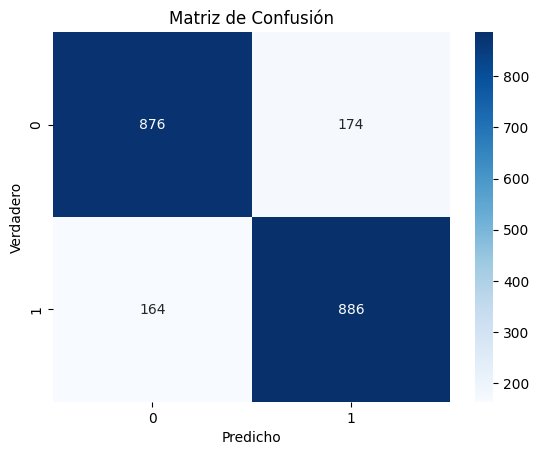

In [73]:
import numpy as np
import re
import unicodedata
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stopwords_pt = set(stopwords.words('portuguese'))

# Funciones de limpieza (de celdas previas)
def deaccent(text):
    nfkd = unicodedata.normalize('NFD', str(text))
    return ''.join([c for c in nfkd if not unicodedata.combining(c)])

def basic_clean(text):
    text = str(text)
    text = re.sub(r"http\S+|www\S+", " ", text)
    text = re.sub(r"[^\w\s@#?]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    text = deaccent(text)
    return text

def tokenize(text):
    return re.findall(r"@[A-Za-z0-9_]+|#[A-Za-z0-9_]+|\w+|\?", text, flags=re.UNICODE)

# Funciones de detección ampliadas
def contains_insult(text, pre_tokenized=None):
    """Devuelve True si el texto contiene alguna palabra del vocabulario de insultos"""
    tokens = pre_tokenized if pre_tokenized is not None else [t.lower() for t in tokenize(basic_clean(text))]
    return any(t in hybrid_insults for t in tokens)

def contains_excessive_caps(text, pre_tokenized=None):
    """Devuelve True si más del 30% de las palabras alfabéticas están en mayúsculas"""
    tokens = pre_tokenized if pre_tokenized is not None else tokenize(basic_clean(text))
    alpha_tokens = [t for t in tokens if t.isalpha()]
    if not alpha_tokens:
        return False
    upper_count = sum(1 for t in alpha_tokens if t.isupper() and len(t) > 1)
    return (upper_count / len(alpha_tokens)) > 0.3

def contains_question(text, pre_tokenized=None):
    """Devuelve True si el texto contiene múltiples signos de interrogación"""
    tokens = pre_tokenized if pre_tokenized is not None else tokenize(basic_clean(text))
    return sum(1 for t in tokens if t == '?') > 1

def contains_emphatic_punctuation(text, pre_tokenized=None):
    """Devuelve True si el texto contiene puntuación repetida (!!! o ???)"""
    tokens = pre_tokenized if pre_tokenized is not None else tokenize(basic_clean(text))
    return any(t in ['!!!', '????'] for t in tokens)

def contains_negative_emoji(text):
    """Devuelve True si el texto contiene emojis negativos"""
    negative_emojis = ['😡', '🤬', '💩', '👎', '😣', '🤮', '🖕']
    return any(emoji in text for emoji in negative_emojis)

def contains_offensive_ngram(text, pre_tokenized=None):
    """Devuelve True si el texto contiene n-gramas ofensivos"""
    offensive_ngrams = ['filho da', 'vai tomar', 'sem vergonha', 'lixo humano']
    tokens = pre_tokenized if pre_tokenized is not None else tokenize(basic_clean(text))
    text_lower = ' '.join(t.lower() for t in tokens)
    return any(ngram in text_lower for ngram in offensive_ngrams)

def contains_targeted_mention(text, pre_tokenized=None):
    """Devuelve True si una mención (@user) va seguida de un insulto"""
    tokens = pre_tokenized if pre_tokenized is not None else tokenize(basic_clean(text))
    for i, token in enumerate(tokens[:-1]):
        if token.startswith('@') and tokens[i+1].lower() in hybrid_insults:
            return True
    return False

def contains_negation_insult(text, pre_tokenized=None):
    """Devuelve True si hay un insulto sin negación previa"""
    tokens = pre_tokenized if pre_tokenized is not None else tokenize(basic_clean(text))
    negations = ['nao', 'não', 'nunca', 'jamais']
    for i, token in enumerate(tokens):
        if token.lower() in hybrid_insults:
            prev_tokens = tokens[max(0, i-2):i]
            if not any(p.lower() in negations for p in prev_tokens):
                return True
    return False

def contains_political_term(text, pre_tokenized=None):
    """Devuelve True si el texto contiene términos políticos ofensivos"""
    political_insults = ['comunista', 'fascista', 'petista', 'bolsonarista', 'esquerdopata', 'direitopata']
    tokens = pre_tokenized if pre_tokenized is not None else [t.lower() for t in tokenize(basic_clean(text))]
    return any(t in political_insults for t in tokens)

# Función de polaridad (de la celda corregida)
def polarity_score(text, pre_tokenized=None):
    if pre_tokenized is None:
        toks = [t.lower() for t in tokenize(basic_clean(text))]
    else:
        toks = pre_tokenized
    if len(toks) == 0:
        return 0
    return sum(token_weights.get(t, 0) for t in toks) / len(toks)

# Función apply_rules mejorada con combinaciones ampliadas
def apply_rules(text, pre_tokenized=None):
    """Clasifica un comentario como ofensivo (1) o no ofensivo (0) basado en reglas jerárquicas"""
    tokens = pre_tokenized if pre_tokenized is not None else tokenize(basic_clean(text))

    # Regla 1: Insulto sin negación + mayúsculas + emoji negativo
    if (contains_negation_insult(text, tokens) and
        contains_excessive_caps(text, tokens) and
        contains_negative_emoji(text)):
        return 1

    # Regla 2: Insulto sin negación + mención dirigida
    if contains_negation_insult(text, tokens) and contains_targeted_mention(text, tokens):
        return 1

    # Regla 3: Insulto sin negación + n-grama ofensivo
    if contains_negation_insult(text, tokens) and contains_offensive_ngram(text, tokens):
        return 1

    # Regla 4: Insulto sin negación + polaridad alta
    if contains_negation_insult(text, tokens) and polarity_score(text, tokens) > polar_threshold:
        return 1

    # Regla 5: Polaridad alta + puntuación enfática
    if polarity_score(text, tokens) > polar_threshold and contains_emphatic_punctuation(text, tokens):
        return 1

    # Regla 6: Insulto sin negación + términos políticos
    if contains_negation_insult(text, tokens) and contains_political_term(text, tokens):
        return 1

    # Regla 7: Insulto sin negación + mayúsculas
    if contains_negation_insult(text, tokens) and contains_excessive_caps(text, tokens):
        return 1

    # Regla 8: Insulto sin negación + múltiples interrogaciones
    if contains_negation_insult(text, tokens) and contains_question(text, tokens):
        return 1

    # Regla 9: Insulto sin negación (sustituye a contains_insult)
    if contains_negation_insult(text, tokens):
        return 1

    # Regla 10: Polaridad mayor que el umbral
    if polarity_score(text, tokens) > polar_threshold:
        return 1

    # Si no cumple ninguna, se considera no ofensivo
    return 0

# Pre-tokenizar test_df para optimizar
test_df['tokens'] = test_df['text'].apply(lambda x: tokenize(basic_clean(x)))

# Aplicar reglas al conjunto de test
test_df['pred_rule'] = [apply_rules(t, toks) for t, toks in zip(test_df['text'], test_df['tokens'])]

# Evaluar rendimiento
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print("Accuracy:", accuracy_score(test_df['label'], test_df['pred_rule']))
print("Precision:", precision_score(test_df['label'], test_df['pred_rule']))
print("Recall:", recall_score(test_df['label'], test_df['pred_rule']))
print("F1-score:", f1_score(test_df['label'], test_df['pred_rule']))
print("Confusion Matrix:\n", confusion_matrix(test_df['label'], test_df['pred_rule']))

# Visualizar matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(test_df['label'], test_df['pred_rule'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.show()

Integrar todo en un único clasificador

In [ ]:
# def classify_offense(text):
#     if contains_explicit_insult(text):
#         return 1  # ofensivo
#     elif contains_insult_with_pronoun(text):
#         return 1
#     elif contains_offensive_structure(text):
#         return 1
#     elif contains_negative_expression(text):
#         return 1
#     else:
#         return 0  # no ofensivo

# df["rule_based_pred"] = df["clean_text"].apply(classify_offense)
